In [1]:
#Importing Libraries
#basics and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#ML Libraries
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import explained_variance_score as evs

#Ignore Warning
import warnings as wrn
wrn.filterwarnings('ignore')

In [2]:
#Reading the csv file
df =pd.read_csv('balance-scale.csv')
df.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


Calling info to check the number of missing values and datatypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       625 non-null    object
 1   L-Weight    625 non-null    int64 
 2   L-Distance  625 non-null    int64 
 3   R-Weight    625 non-null    int64 
 4   R-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


Label Encoding the 'Class' column so that heatmap can be plotted

plotting the pairplot and heatmap to see the correlation among attribute

<AxesSubplot:>

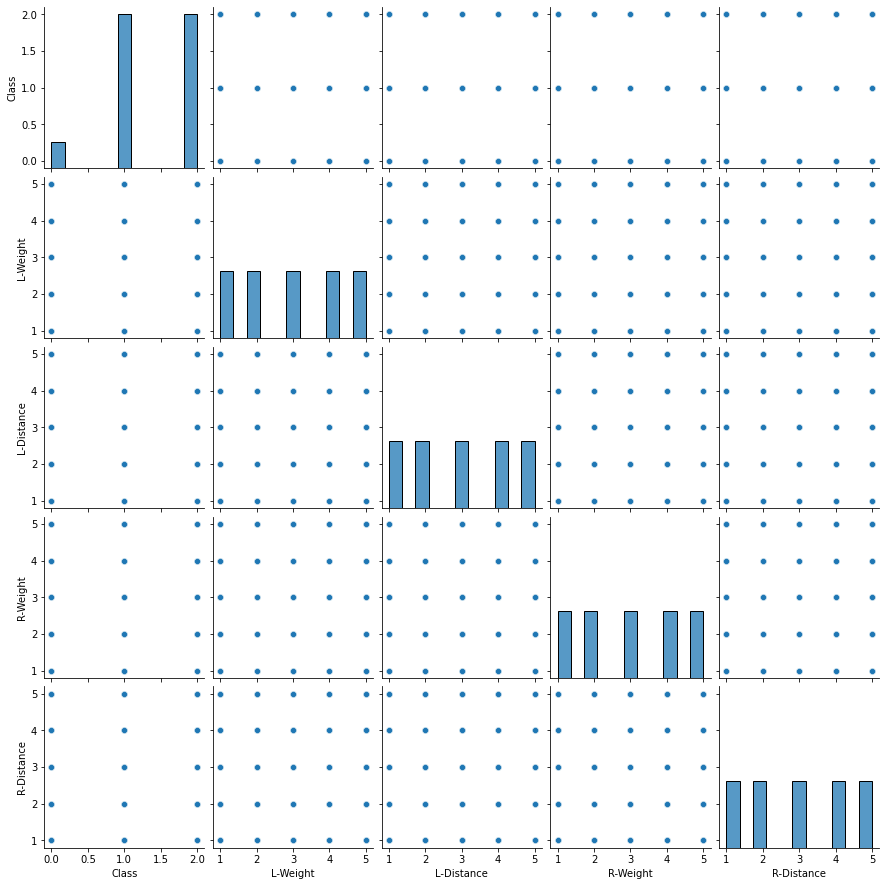

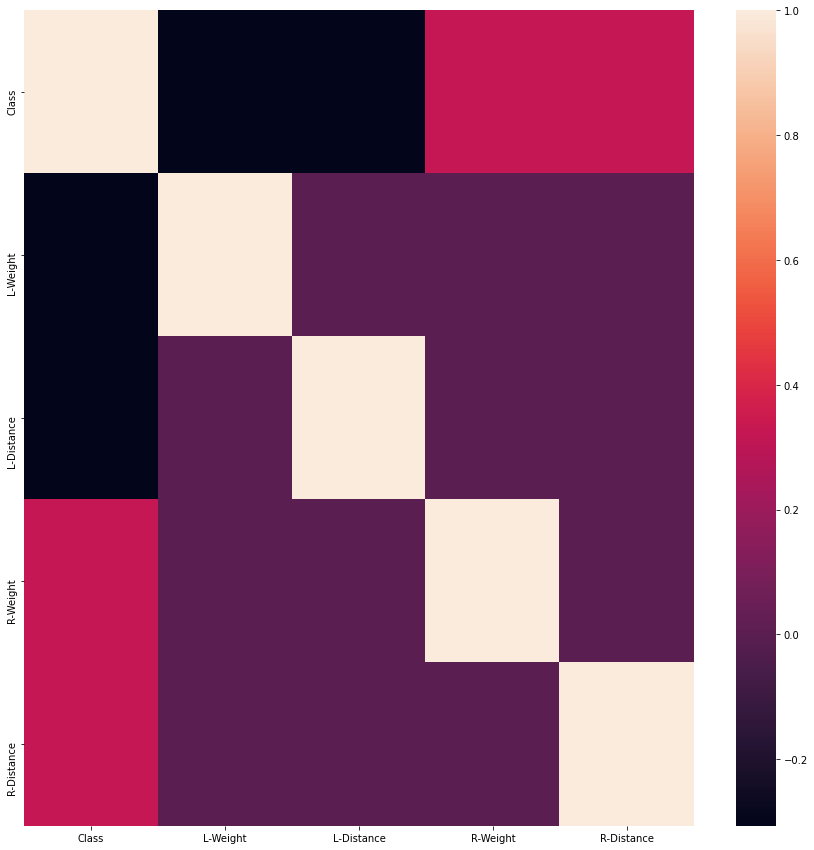

In [4]:
#Visualization after doing Label Encoding
df['Class'] = LabelEncoder().fit_transform(df['Class'].tolist())

#pairplot
sns.pairplot(data=df)
# Heatmap
num_feat = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

Conclusion : Plots show that the other attributes are equally correlated to Class.

Hence, droping other columns except for 'Class' is not required
Seperating features as X and target value as y :

'Class' in y
'L-Weight', 'R-Weight', 'L-Distance', 'R-Distance' in X

Conclusion : Plots show that the other attributes are equally correlated to Class.


Hence, dropping other column except for 'Class' is not required

Seperating features as X and target value as y:

'Class' in y
 
 'L-Weight','R-Weight', 'L-Distance', 'R-Distance' in X

In [5]:
#Dividing X and y
y=df[['Class']]
X = df.drop(['Class'],axis =1)

In [6]:
y.head()

,Class
0,0
1,2
2,2
3,2
4,2


In [7]:
X.head()

,L-Weight,L-Distance,R-Weight,R-Distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


Spliting the X and y in four DataFrame : train_X, test_X, train_y and test_y using train_test_split

In [8]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 20)

In [9]:
#Classification and prediction
#ExtraTreeClassifier

clf = ExtraTreesClassifier(n_estimators=1000)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  80.0


In [10]:
#classification and Prediction
#XGBoost
clf=XGBClassifier(learning_rate=0.5,n_jobs=-1, n_estimators=1000)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent', score(pred, test_y)*100)

[14:46:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy in percent 75.0


In [11]:
# Classification and prediction
#Random Forest

clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ', score(pred, test_y)*100)

Accuracy in percent =  70.0


In [12]:
#Classification and Prediction
#DT
clf =DecisionTreeClassifier()
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent', score(pred, test_y)*100)

Accuracy in percent 65.0


In [13]:
#Classification and prediction
#SVM

clf = SVC()
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  95.0


In [14]:
#Classification and prediction
#KNN

clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  85.0


Conclusion : SVM have best accuracy with 95%